In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import os
import warnings
warnings.filterwarnings('ignore')

/home/user01/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
path = os.getcwd()

In [3]:
#importing the dataset
dataset = pd.read_csv(f"{path}/phishcoop.csv")
dataset

,id,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6987,6988,1,-1,1,1,1,-1,1,1,-1,...,1,1,-1,1,1,1,1,0,1,1
6988,6989,-1,-1,1,1,1,-1,0,-1,1,...,1,1,-1,1,1,1,1,0,1,-1
6989,6990,-1,-1,1,1,1,-1,0,1,1,...,1,1,-1,1,1,1,1,0,1,1
6990,6991,-1,-1,1,-1,-1,1,-1,1,1,...,-1,1,-1,1,1,-1,-1,0,1,1


In [4]:
dataset = dataset.drop('id', 1) #removing unwanted column
x = dataset.iloc[ : , :-1].values
y = dataset.iloc[:, -1:].values

#spliting the dataset into training set and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state =0 )

#fitting logistic regression 
classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train)

DecisionTreeClassifier()

In [5]:
y_pred=classifier.predict(x_test)

In [6]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9685354691075515

In [7]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3]
}

In [24]:
grid_search=GridSearchCV(estimator=classifier,param_grid=param_grid,scoring='accuracy',cv=2)

In [25]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5]},
             scoring='accuracy')

In [26]:
grid_search.best_params_

{'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [27]:
model_2=DecisionTreeClassifier(max_depth=6,min_samples_leaf=1,min_samples_split=2)

In [28]:
model_2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [29]:
y_pred=model_2.predict(x_test)

In [30]:
accuracy_score(y_test,y_pred)

0.9256292906178489

In [20]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[732  96]
 [ 34 886]]


In [21]:
import matplotlib.pyplot as plt
from sklearn import metrics
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

<Figure size 720x360 with 0 Axes>

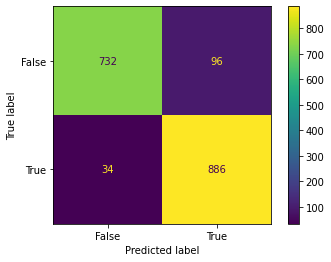

In [22]:
plt.figure(figsize= (10,5))
cm_display.plot()
plt.show()

[Text(0.34271162974683544, 0.98, 'x[7] <= 0.5\ngini = 0.492\nsamples = 5244\nvalue = [2282, 2962]'),
 Text(0.13971518987341772, 0.94, 'x[13] <= -0.5\ngini = 0.192\nsamples = 2179\nvalue = [1944, 235]'),
 Text(0.1346518987341772, 0.9, 'gini = 0.0\nsamples = 1389\nvalue = [1389, 0]'),
 Text(0.14477848101265822, 0.9, 'x[5] <= 0.0\ngini = 0.418\nsamples = 790\nvalue = [555, 235]'),
 Text(0.13971518987341772, 0.86, 'x[25] <= 0.5\ngini = 0.381\nsamples = 746\nvalue = [555, 191]'),
 Text(0.0620253164556962, 0.82, 'x[14] <= 0.5\ngini = 0.157\nsamples = 362\nvalue = [331, 31]'),
 Text(0.043037974683544304, 0.78, 'x[6] <= 0.5\ngini = 0.129\nsamples = 345\nvalue = [321, 24]'),
 Text(0.020253164556962026, 0.74, 'x[11] <= 0.0\ngini = 0.074\nsamples = 287\nvalue = [276, 11]'),
 Text(0.010126582278481013, 0.7, 'x[24] <= 0.0\ngini = 0.375\nsamples = 24\nvalue = [18, 6]'),
 Text(0.005063291139240506, 0.66, 'gini = 0.0\nsamples = 12\nvalue = [12, 0]'),
 Text(0.015189873417721518, 0.66, 'x[0] <= 0.0\ngin

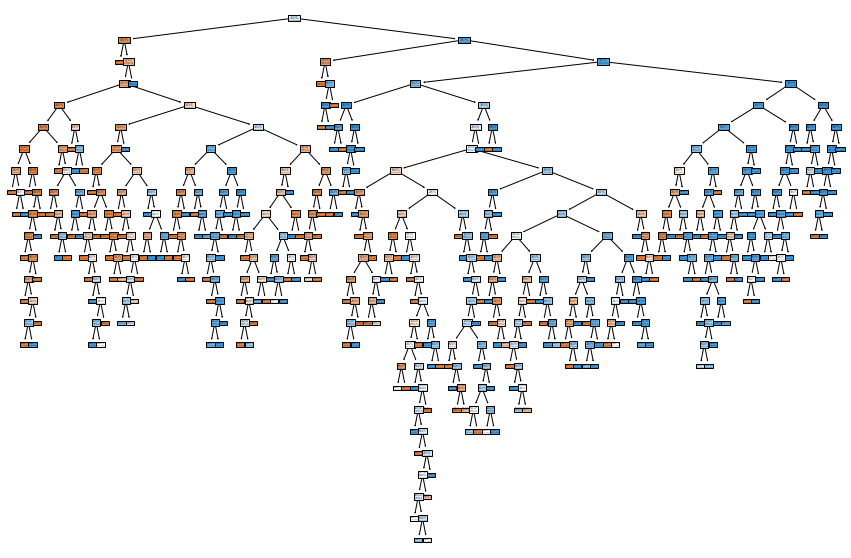

In [23]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(classifier,filled=True)